In [1]:
#use "topfind"
#require "owl-top"
#require "gp"
#require "juplot"
#require "owl"
let _ = Jupyter_notebook.clear_output ()
open Owl
open Gp

- : unit = ()


In [2]:
#directory "_build"
#load "_build/lib.cmo"

In [3]:
module P = struct
    let w_rec = Mat.of_arrays [| [| 5.; -5. |]; [| 5.; -5. |] |]
    let dt = 1E-4
    let sampling_dt = 1E-3
    let tau = 20E-3
    let noise_prms = Some (20E-3, Mat.eye 2)
    let rate_function x = x
end
module D = Lib.Dynamics (P)

module P :
  sig
    val w_rec : Owl.Mat.mat
    val dt : float
    val sampling_dt : float
    val tau : float
    val noise_prms : (float * Owl.Mat.mat) option
    val rate_function : 'a -> 'a
  end


module D :
  sig
    val n : int
    val noise :
      (unit -> (float, Bigarray.float64_elt) Owl_dense_matrix_generic.t)
      option
    val simulate : ?verbose:bool -> duration:float -> Owl.Mat.mat
  end


In [4]:
let x = D.simulate ~verbose:false ~duration:1.;;

val x : Owl.Mat.mat =
  
            C0        C1 
  R0         0         0 
  R1 -0.064985 0.0292274 
  R2 -0.164369 0.0375373 
  R3 -0.289444 0.0295546 
  R4  -0.42448 0.0108251 
           ...       ... 
R995   3.68122   3.39808 
R996   3.54406   3.31975 
R997   3.38995   3.23642 
R998   3.23608   3.13876 
R999   3.11001   3.04247 



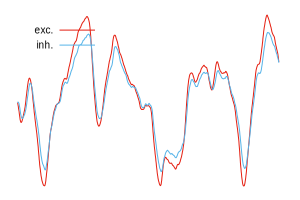

- : unit = ()


In [5]:
let _ = Juplot.draw ~fmt:`svg ~size:(300,200) (fun (module F) ->
    F.barebone ();
    F.ex "set key top left";
    F.plot [| [ Mat.col x 0 ], "t 'exc.' w l lc 7";
              [ Mat.col x 1 ], "t 'inh.' w l lc 3" |])